In [1]:
import numpy as np
import pandas as pd
import re
import difflib
import seaborn as sns
import math
import matplotlib.pyplot as plt 
%matplotlib inline
from math import factorial

**Read Data**

In [2]:
!pwd

/Users/jaichitra.balakrishnan/galvanizeu/DSCI6002-student/Project


In [3]:
mdf     = pd.read_csv("Menu_Cleanse.csv")

In [4]:
menuitem = pd.read_csv("../data/whats-on-the-menu/MenuItem.csv")

In [21]:
dish = pd.read_csv("../data/whats-on-the-menu/Dish.csv")

**Data Health Check and Prepare Clean Data Set for Analysis**

_MenuItem File_

In [5]:
# Subset relevant data
menuitem.head(n=5)
midf = menuitem[['id', 'menu_page_id', 'price', 'dish_id']]

In [6]:
df = pd.merge(mdf, midf, on=['id'], how = 'left')
df.head(n=5)

,Unnamed: 0,id,event,venue,occasion,location,status,dish_count,year,month,day,eventt,occasion_type,menu_page_id,price,dish_id
0,0,12463,breakfast,commercial,easter,hotel eastman,complete,67,1900,4,15,breakfast,unknown,4129.0,0.1,2479.0
1,1,12464,dinner,commercial,easter,republican house,complete,34,1900,4,15,dinner,unknown,4895.0,NaN,7293.0
2,2,12465,fruhstuck breakfast,commercial,NaN,norddeutscher lloyd bremen,complete,84,1900,4,16,breakfast,unknown,5171.0,0.5,7294.0
3,3,12466,lunch,commercial,NaN,norddeutscher lloyd bremen,complete,63,1900,4,16,lunch,unknown,4895.0,NaN,7295.0
4,4,12467,dinner,commercial,NaN,norddeutscher lloyd bremen,complete,33,1900,4,16,dinner,unknown,4895.0,NaN,7296.0


In [7]:
# Replace missing values for dish id by the year's mode
df['dish_id'] = df.groupby(["year"]).dish_id.transform(lambda x: x.fillna(x.value_counts().index[0]))

In [8]:
# Replace missing values for price by the year and location's mean
df['price'] = df.groupby(["year","location"]).price.transform(lambda x: x.fillna(x.mean()))

In [9]:
# Replace missing values for price by the year's mean
df['price'] = df.groupby(["eventt"]).price.transform(lambda x: x.fillna(x.mean()))

In [10]:
#df.loc[df.price > 1, 'price'] = round(df.price,0)-df.price

In [11]:
#df.loc[df.price < 1, 'price'] = abs(df.price)

In [12]:
df.price.max()

100.0

In [13]:
df[df.price.isnull()]

,Unnamed: 0,id,event,venue,occasion,location,status,dish_count,year,month,day,eventt,occasion_type,menu_page_id,price,dish_id


In [14]:
df[df.location == 'alpha of zeta psi']

,Unnamed: 0,id,event,venue,occasion,location,status,dish_count,year,month,day,eventt,occasion_type,menu_page_id,price,dish_id
11,11,12474,annual banquet,commercial,NaN,alpha of zeta psi,complete,38,1900,4,17,organized,unknown,4895.0,0.944748,7300.0


In [15]:
# Make id and dish id to int fields
df["id"] = df.id.apply(int)
#df["menu_page_id"] = df.menu_page_id.apply(int)
df["dish_id"] = df.dish_id.apply(int)
df["price"] = df.price.apply(int)

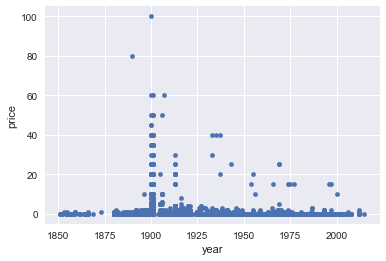

In [16]:
df.plot(kind='scatter',
         x='year',
         y='price');

There is an upward trend to the price but its correlation to year if any is not apparent at this stage

4053 0


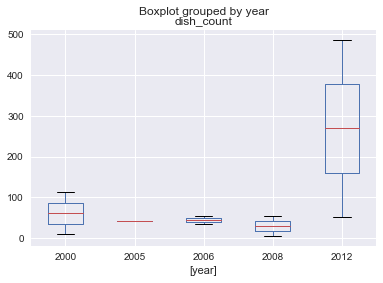

In [17]:
# Distribution of menu fish counts
print(df.dish_count.max(), df.dish_count.min())
df[(df.year >= 2000) & ((df.eventt =='lunch') | (df.eventt =='dinner') | (df.event == 'breakfast'))][["year", "dish_count", "eventt"]].boxplot(by = "year")

There are not many outliers in the dish count in each year. And, there seems to be a generakl upward trend with highest concentration in the 50% percentile

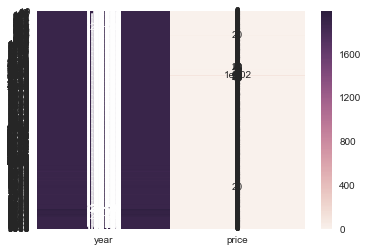

In [18]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df[df.event=="breakfast"][["year", "price"]], annot=True);

In [19]:
df.head(n=10)

,Unnamed: 0,id,event,venue,occasion,location,status,dish_count,year,month,day,eventt,occasion_type,menu_page_id,price,dish_id
0,0,12463,breakfast,commercial,easter,hotel eastman,complete,67,1900,4,15,breakfast,unknown,4129.0,0,2479
1,1,12464,dinner,commercial,easter,republican house,complete,34,1900,4,15,dinner,unknown,4895.0,0,7293
2,2,12465,fruhstuck breakfast,commercial,NaN,norddeutscher lloyd bremen,complete,84,1900,4,16,breakfast,unknown,5171.0,0,7294
3,3,12466,lunch,commercial,NaN,norddeutscher lloyd bremen,complete,63,1900,4,16,lunch,unknown,4895.0,0,7295
4,4,12467,dinner,commercial,NaN,norddeutscher lloyd bremen,complete,33,1900,4,16,dinner,unknown,4895.0,0,7296
5,5,12468,dinner,commercial,NaN,canadian pacific railway company,complete,37,1900,4,16,dinner,unknown,4129.0,0,2474
6,6,12469,supper,commercial,NaN,hotel netherland,complete,144,1900,4,16,dinner,unknown,910.0,0,7305
7,7,12470,fruhstuck breakfast,commercial,NaN,norddeutscher lloyd bremen,complete,80,1900,4,17,breakfast,unknown,4895.0,0,7297
8,8,12471,lunch,commercial,NaN,norddeutscher lloyd bremen,complete,67,1900,4,17,lunch,unknown,5171.0,0,77083
9,9,12472,dinner,commercial,NaN,norddeutscher lloyd bremen,complete,29,1900,4,17,dinner,unknown,5171.0,0,232


_Dish File_

In [22]:
# Subset relevant data
dish.head(n=5)
ddf = dish
ddf.drop('description', axis=1)

,id,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,Consomme printaniere royal,8,9,1897,1927,0.20,0.40
1,2,Chicken gumbo,110,116,1895,1960,0.10,0.80
2,3,Tomato aux croutons,13,13,1893,1917,0.25,0.40
3,4,Onion au gratin,41,41,1900,1971,0.25,1.00
4,5,St. Emilion,66,68,1881,1981,0.00,18.00
5,7,Radishes,3265,3349,1854,2928,0.00,25.00
6,8,Chicken soup with rice,48,49,1897,1961,0.10,0.60
7,9,Clam broth (cup),15,17,1899,1962,0.15,0.40
8,10,"Cream of new asparagus, croutons",2,2,1900,1900,0.00,0.00
9,11,Clear green turtle,157,157,1893,1937,0.25,60.00


In [23]:
df = pd.merge(df, ddf, left_on=['dish_id'], right_on=['id'], how = 'left')
df.head(n=5)

,Unnamed: 0,id_x,event,venue,occasion,location,status,dish_count,year,month,...,dish_id,id_y,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,0,12463,breakfast,commercial,easter,hotel eastman,complete,67,1900,4,...,2479,2479,Custard Pie,NaN,295,301,1866,1955,0.05,15.0
1,1,12464,dinner,commercial,easter,republican house,complete,34,1900,4,...,7293,7293,"Cream of Artichokes, Jerusalem",NaN,2,2,1906,1906,0.00,0.0
2,2,12465,fruhstuck breakfast,commercial,NaN,norddeutscher lloyd bremen,complete,84,1900,4,...,7294,7294,"Assort. Cold Meat, Wanamaker Salad",NaN,2,2,1906,1906,0.50,0.5
3,3,12466,lunch,commercial,NaN,norddeutscher lloyd bremen,complete,63,1900,4,...,7295,7295,French Pot-au-feu,NaN,2,2,1906,1906,0.00,0.0
4,4,12467,dinner,commercial,NaN,norddeutscher lloyd bremen,complete,33,1900,4,...,7296,7296,Santa Claus Ice Cream,NaN,2,2,1906,1906,0.00,0.0


In [24]:
df.to_csv("Structured_Menu.csv")